In [7]:
import numpy as np
from PIL import Image
import scipy.fftpack as fp
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import img_as_float
from scipy import signal, ndimage
import matplotlib.pylab as pylab
# % matplotlib inline

In [3]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

<ipython-input-6-3e8804e3f5d2>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+fp.fftshift(freq))).astype(int))
<ipython-input-6-3e8804e3f5d2>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+fp.fftshift(freq_kernel))).astype(int))
<ipython-input-6-3e8804e3f5d2>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1 + fp.fftshift(convolved))).astype(int))


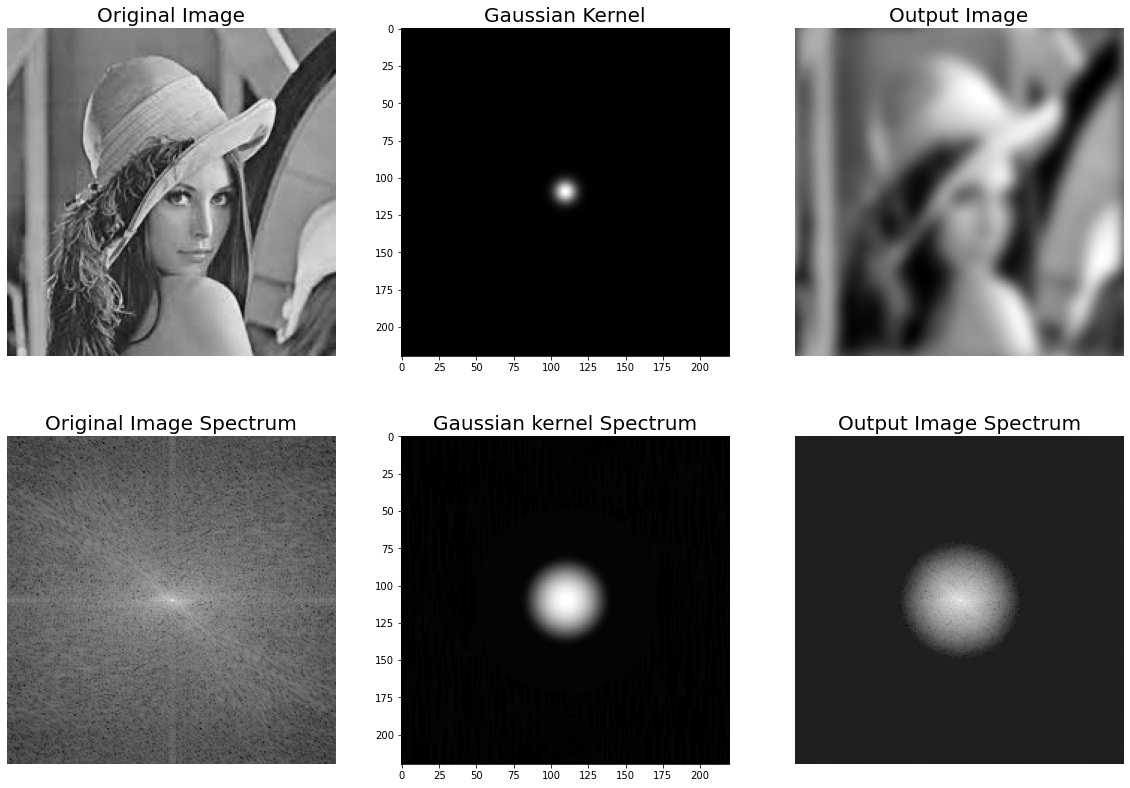

In [6]:
pylab.figure(figsize=(20 ,15))
pylab.gray()
im = np.mean(imread("images/lena.jpg"), axis=2)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel
im1 = fp.ifft2(convolved).real
pylab.subplot(2, 3, 1)
pylab.imshow(im)
pylab.title('Original Image', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 2)
pylab.imshow(gauss_kernel)
pylab.title('Gaussian Kernel', size=20)

pylab.subplot(2, 3, 3)
pylab.imshow(im1)
pylab.title('Output Image', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 4)
pylab.imshow((20*np.log10(0.1+fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 5)
pylab.imshow((20*np.log10(0.1+fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian kernel Spectrum', size=20)

pylab.subplot(2, 3, 6)
pylab.imshow((20*np.log10(0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20)
pylab.axis('off')

pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

<function matplotlib.pyplot.show(close=None, block=None)>

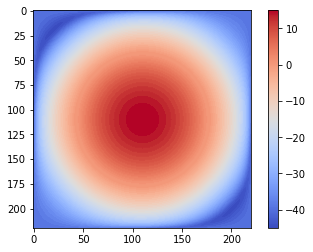

In [9]:
im = rgb2gray(imread('images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1), signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow((20*np.log10(0.01+fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
pylab.colorbar()
pylab.show
                    

In [10]:
im = np.mean(imread('images/mandrill.jpg'), axis=2)
print(im.shape)

(224, 225)


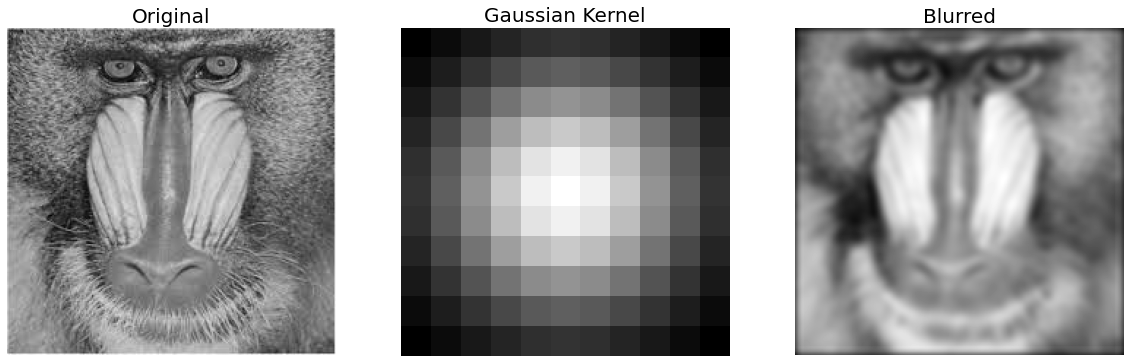

In [12]:
gauss_kernel = np.outer(signal.gaussian(11 ,3), signal.gaussian(11, 3))
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original , ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20, 8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()

ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian Kernel', size=20)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()

fig.show()

<ipython-input-14-6ed6cd268279>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
<ipython-input-14-6ed6cd268279>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')


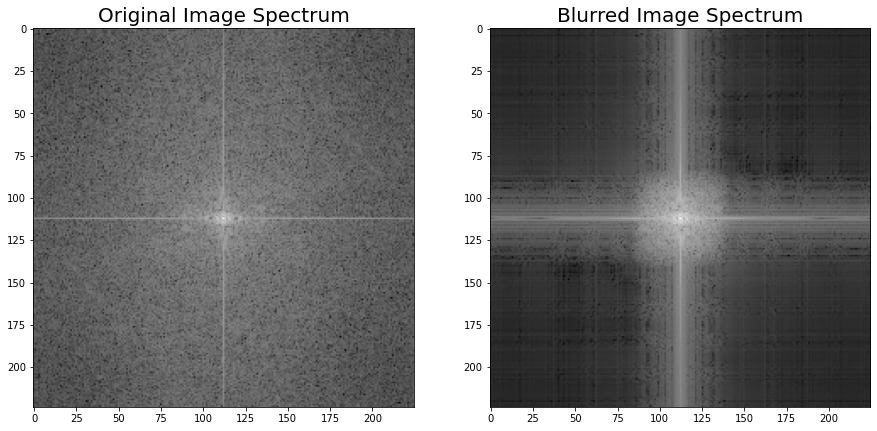

In [14]:
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
pylab.figure(figsize=(15, 8))
pylab.subplot(1, 2, 1)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
pylab.title('Original Image Spectrum', size=20)
F1 = fp.fft2((im_blurred).astype(float))
F2 = fp.fftshift(F1)
pylab.subplot(1, 2, 2)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

In [2]:
im = np.mean(imread('images/mandrill.jpg'), axis=2)
print(im.shape)

(224, 225)


In [3]:
import timeit

In [6]:
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode="same")
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

(-0.5, 224.5, 223.5, -0.5)

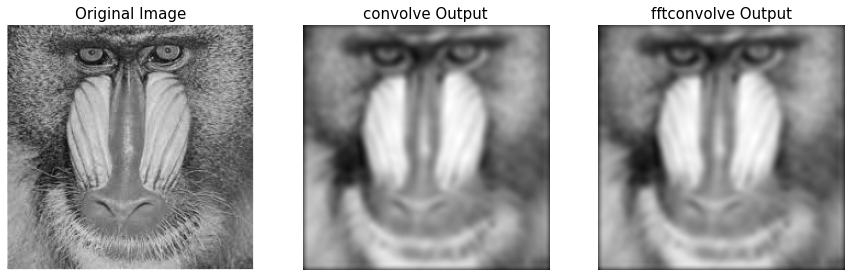

In [7]:
pylab.figure(figsize=(15, 5))
pylab.gray()
pylab.subplot(131)
pylab.imshow(im)
pylab.title('Original Image', size=15)
pylab.axis('off')

pylab.subplot(132)
pylab.imshow(im_blurred1)
pylab.title('convolve Output', size=15)
pylab.axis('off')

pylab.subplot(133)
pylab.imshow(im_blurred2)
pylab.title('fftconvolve Output', size=15)
pylab.axis('off')

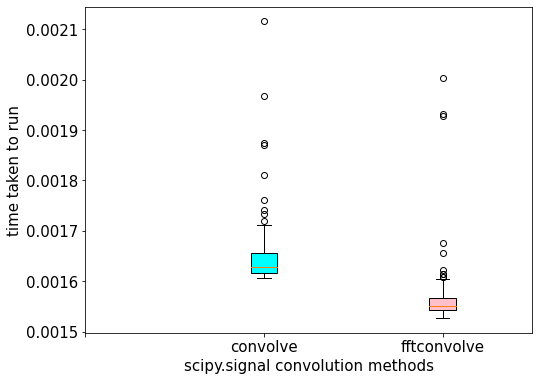

In [9]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True)
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size=15)
pylab.show()

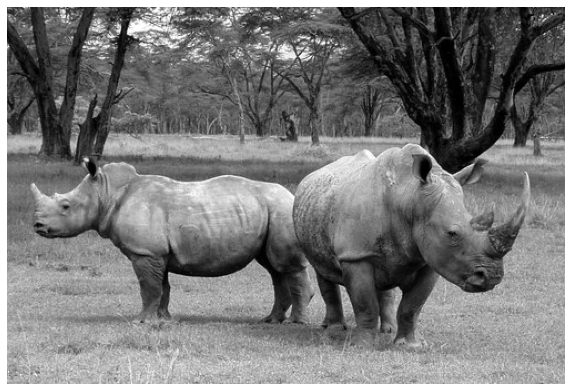

In [14]:
im = np.array(Image.open('images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10, 10))
pylab.imshow(im, cmap=pylab.cm.gray)
pylab.axis('off')
pylab.show()

<ipython-input-17-e8f9565c07c0>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+freq2)).astype(int))


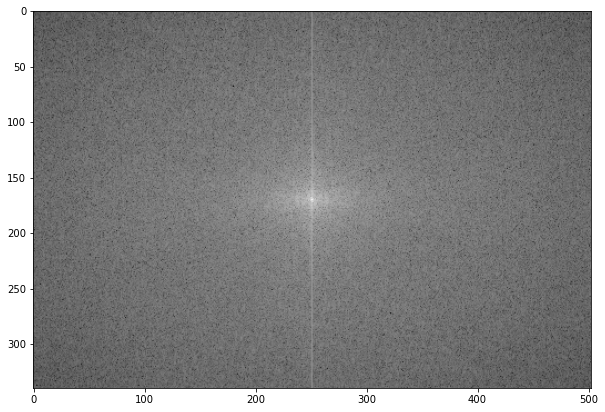

In [17]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log10(0.1+freq2)).astype(int))
pylab.show()

<ipython-input-19-8a1d5b6816f9>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+freq2)).astype(int))


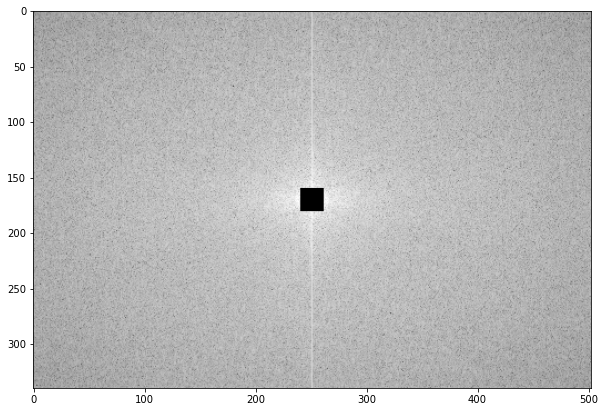

In [19]:
# apply HPF
freq2[half_w-10:half_w+11, half_h-10:half_h+11] = 0
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log10(0.1+freq2)).astype(int))
pylab.show()

In [22]:
im1 = np.clip(fp.ifft2(fp.ifftshift(freq2)).real, 0, 255)
print(signaltonoise(im1, axis=None))

0.5900939025690546


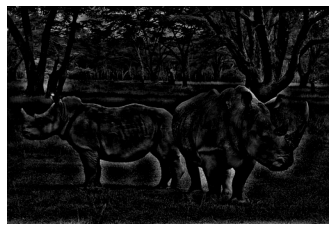

In [23]:
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.show()

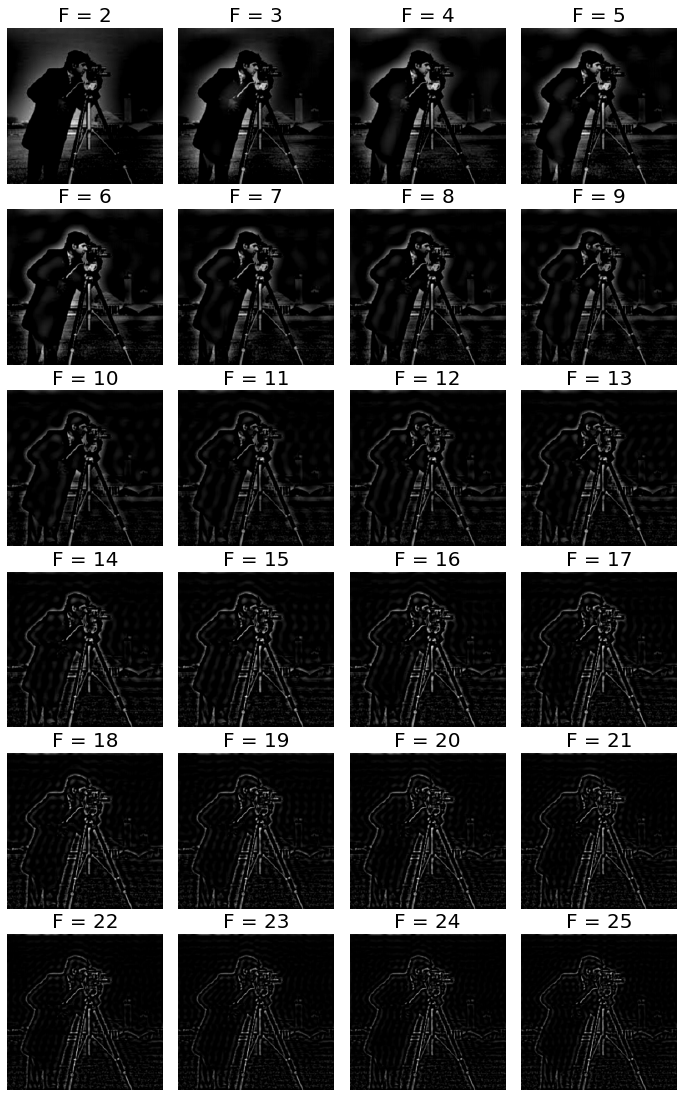

In [29]:
im = np.array(Image.open('images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []
lbs = list(range(1, 25))
pylab.figure(figsize=(12, 20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fp.fftshift(freq1)
    freq2[half_w-l:half_w+l+1, half_h-l:half_h+l+1] = 0
    im1 = np.clip(fp.ifft2(fp.ifftshift(freq2)).real, 0, 255)
    snrs_hp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6, 4, l)
    pylab.imshow(im1, cmap='gray')
    pylab.axis('off')
    pylab.title('F = ' + str(l+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

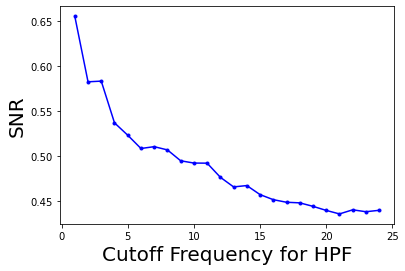

In [30]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Frequency for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

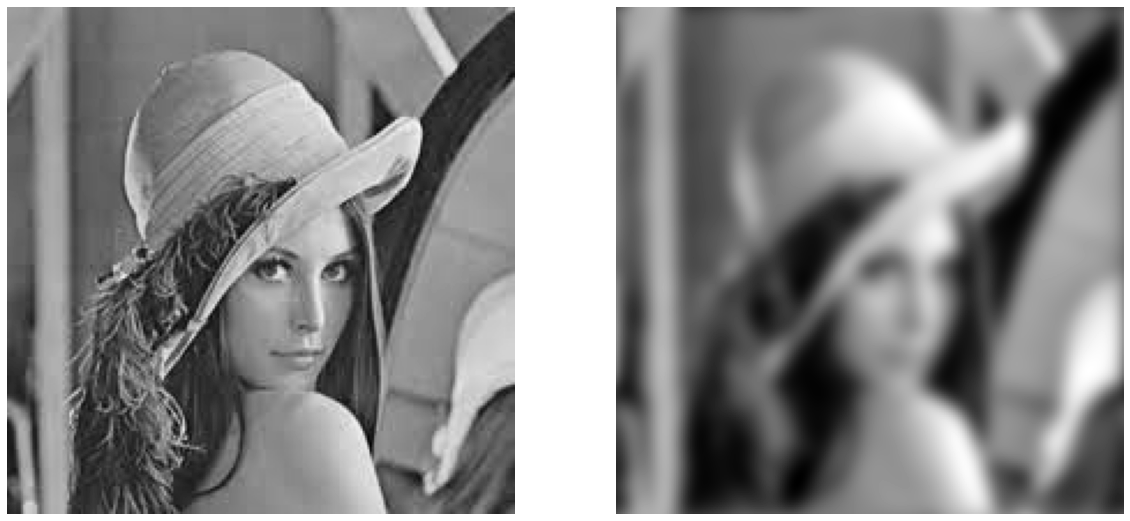

In [32]:
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10))
pylab.gray()
im = np.mean(imread('images/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im)
axes1.axis('off')
axes2.imshow(im1.real)
axes2.axis('off')
pylab.show()

<ipython-input-33-d92c3813eef7>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+np.fft.fftshift(freq_gaussian))).astype(int))


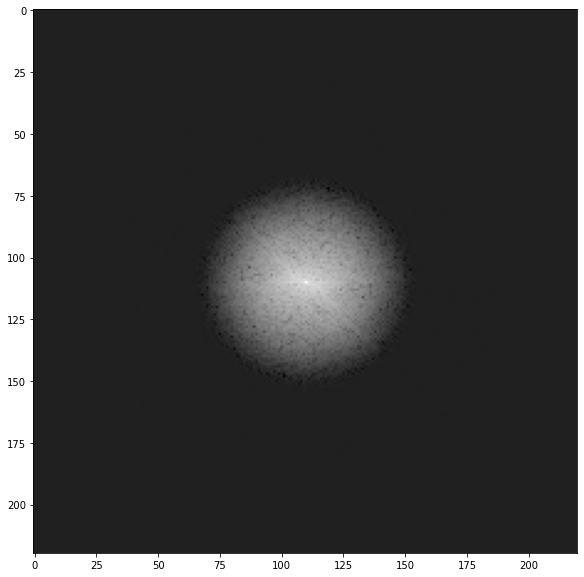

In [33]:
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log10(0.1+np.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

2.399187957424147


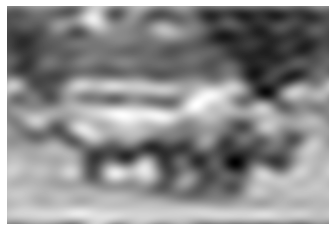

In [35]:
im = np.array(Image.open('images/rhino.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11, half_h-10:half_h+11] = 0
freq2 -= freq2_low
im1 = fp.ifft2(fp.ifftshift(freq2)).real
print(signaltonoise(im1, axis=None))
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.show()

<ipython-input-36-fcbb8c109ac1>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log(0.1+freq2)).astype(int))


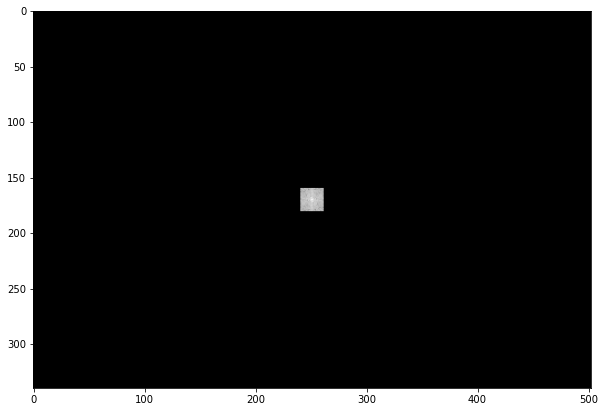

In [36]:
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log(0.1+freq2)).astype(int))
pylab.show()

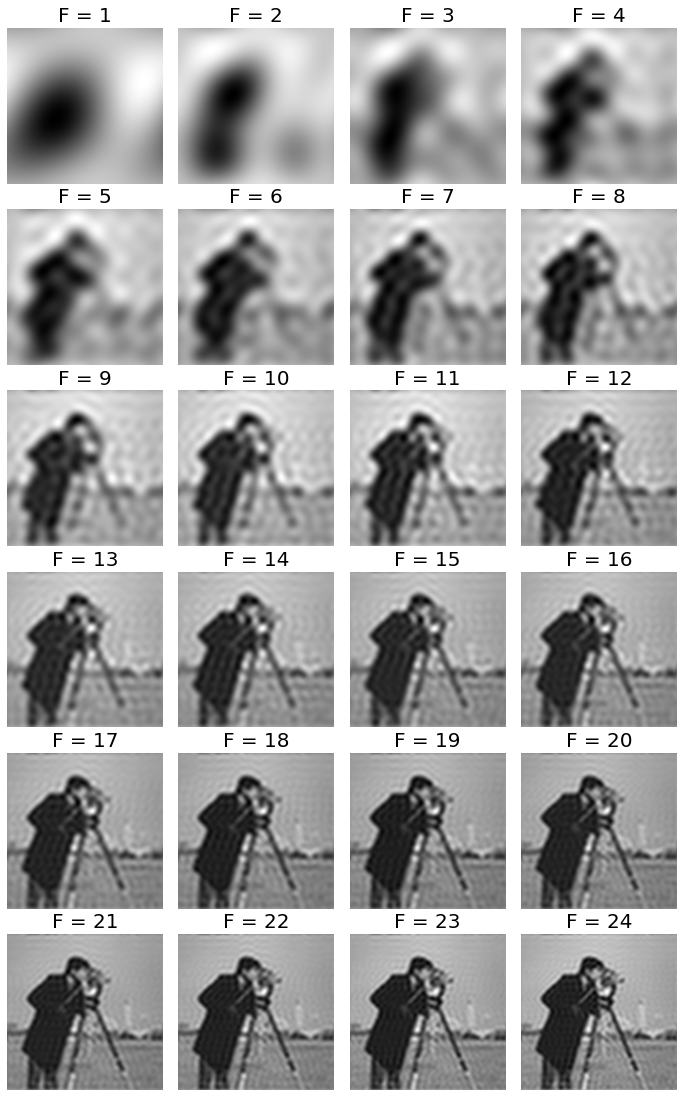

In [4]:
im = np.array(Image.open('images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1, 25))
pylab.figure(figsize=(12, 20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fp.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1, half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low
    im1 = fp.ifft2(fp.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6, 4, u)
    pylab.imshow(im1, cmap='gray')
    pylab.axis('off')
    pylab.title('F = '+str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

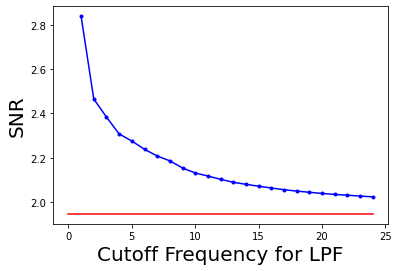

In [6]:
snr = signaltonoise(im ,axis=None)
pylab.plot(ubs, snrs_lp, 'b.-')
pylab.plot(range(25), [snr]*25, 'r-')
pylab.xlabel('Cutoff Frequency for LPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

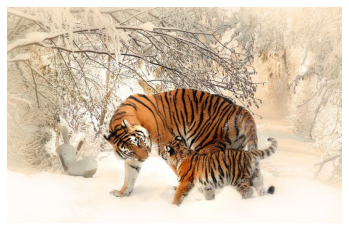

In [8]:
im = img_as_float(imread("images/tigers.jpeg"))
pylab.figure()
pylab.imshow(im)
pylab.axis('off')
pylab.show()

2.0134320294926327


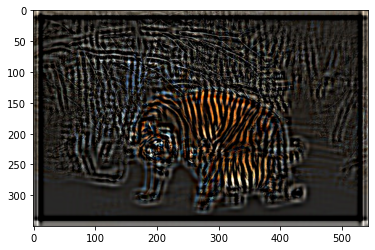

In [11]:
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d)
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure()
pylab.imshow(np.clip(im, 0, 1))
print(np.max(im))
pylab.show()


(340, 453)


<ipython-input-19-ed41427f27e0>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap=pylab.cm.gray)
<ipython-input-19-ed41427f27e0>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap=pylab.cm.gray)


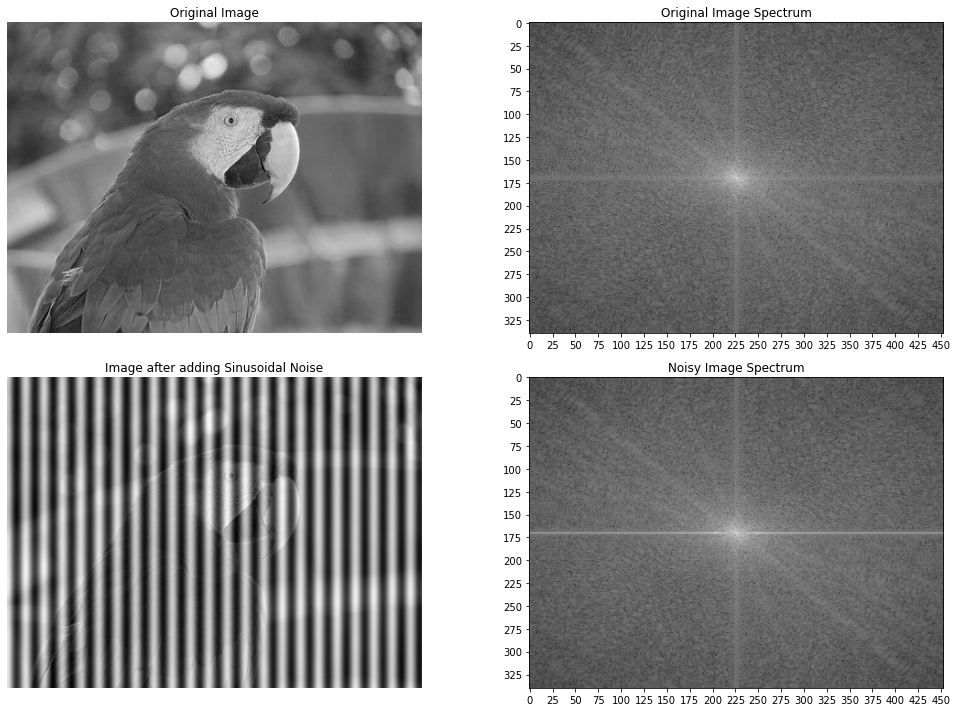

In [19]:
pylab.figure(figsize=(15, 10))
im = np.mean(imread("images/parrot.png"), axis=2) / 255
print(im.shape)
pylab.subplot(2, 2, 1)
pylab.imshow(im, cmap='gray')
pylab.axis('off')
pylab.title('Original Image')

F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
pylab.subplot(2, 2, 2)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Original Image Spectrum')

for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
pylab.subplot(2, 2, 3)
pylab.imshow(im, cmap='gray')
pylab.axis('off')
pylab.title('Image after adding Sinusoidal Noise')

F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
pylab.subplot(2, 2, 4)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Noisy Image Spectrum')

pylab.tight_layout()
pylab.show()

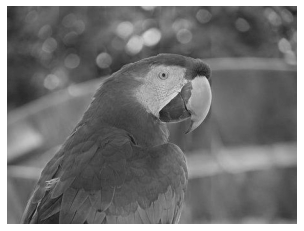

In [20]:
F2[170:176, :220] = F2[170:176, 230:] = 0
im1 = fp.ifft2(fp.ifftshift(F2)).real
pylab.axis('off')
pylab.imshow(im1, cmap='gray')
pylab.show()